Can crater’s records help to understand Mars’craters layers history?

Anando Purutama
june 2016

    Summary
    Introduction
    The Data Set
    Topic of Interest
    Codebook
        Variables
    Testing a Potential Moderator
        Classifying Variables
    Using Python
        Pyhton Code
      

Summary

Specialisation 	Data Analysis and Interpretation
Data Analysis Tools
Education Institution 	Wesleyan University
Publisher 	Coursera
Assignment 4 	Testing a Potential Moderator


Introduction

the fascination of Mars in humans has been reflected in history, many people in every time and place have looked to the sky and have wondered that bright red light: Mars
In modern times there is another kind of questions that the human being does in relation to the red planet.
Among these questions we can find those related to the craters of Mars and geological history especially the history of the craters bucause "understanding impactor and crater populations is a key part of understanding the history of the solar system" (Robbins, S. J. 2011)

The data set is from the work: Thesis Planetary Surface Properties, Cratering Physics, and the Volcanic History of Mars from a New Global Martian Crater Database (2011) by Robbins, S.J., University of Colorado at Boulder. Given by Wesleyan University as part of the Data Analysis and Interpretation Specialisation. 


Topic of Interest

The relation of the mars craters and their location and caracteristics in the suface of mars.


Codebook

Data set of Nine variables. 


Variables

"CRATER_ID: crater ID for internal sue, based upon the region of the planet (116), the “pass” under which the crate was identified, ad the order in which it was identified
LATITUDE_CIRCLE_IMAGE: latitude from the derived centre of a non-linear least-squares circle fit to the vertices selected to manually identify the crater rim (units are decimal degrees North)
LONGITUDE_CIRCLE_IMAGE: longitude from the derived centre of a non-linear least-squares circle fit to the vertices selected to manually identify the crater rim (units are decimal degrees East)
DIAM_CIRCLE_IMAGE: diameter from a non-linear least squares circle fit to the vertices selected to manually identify the crater rim (units are km)
DEPTH_RIMFLOOR_TOPOG: average elevation of each of the manually determined N points along (or inside) the crater rim (units are km)
Depth Rim: Points are selected as relative topographic highs under the assumption they are the least eroded so most original points along the rim
Depth Floor: Points were chosen as the lowest elevation that did not include visible embedded craters
MORPHOLOGY_EJECTA_1: ejecta morphology classified.
If there are multiple values, separated by a “/”, then the order is the inner-most ejecta through the outer-most, or the top-most through the bottom-most
MORPHOLOGY_EJECTA_2: the morphology of the layer(s) itself/themselves. This classification system is unique to this work.
MORPHOLOGY_EJECTA_3: overall texture and/or shape of some of the layer(s)/ejecta that are generally unique and deserve separate morphological classification.
NUMBER_LAYERS: the maximum number of cohesive layers in any azimuthal direction that could be reliably identified"


Testing a Potential Moderator

Is the number of layers a Potential Moderator for the Depth and diagram omage of craters?



Classifying Variables

Number of layers and their relations with diam image and depth topology of the craters  


Using Python / Python Code


references

Robbins, S. J. (2011). Planetary surface properties, cratering physics, and the volcanic history of mars from a new global martian crater database (Doctoral dissertation, University of Colorado).

In [59]:
%matplotlib inline
import numpy 
import pandas 
import scipy.stats
import seaborn 
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as multi
import statsmodels.formula.api as smf


data = pandas.read_csv('crateres.csv')


data_clean=data.dropna()

print ("association between crater DIAM_CIRCLE and crater DEPTH_RIMFLOOR_TOPOG ")
print (scipy.stats.pearsonr(data_clean['DIAM_CIRCLE_IMAGE'], data_clean['DEPTH_RIMFLOOR_TOPOG']))
                  



association between crater DIAM_CIRCLE and crater DEPTH_RIMFLOOR_TOPOG 
(0.56458993625446641, 0.0)


In [58]:
def incomegrp (row):
   if row['NUMBER_LAYERS'] <= 1:
      return 1
   elif row['NUMBER_LAYERS'] <= 2:
      return 2
   elif row['NUMBER_LAYERS'] <= 3:
      return 3
   elif row['NUMBER_LAYERS'] <= 4:
      return 4
   
   
data_clean['incomegrp'] = data_clean.apply (lambda row: incomegrp (row),axis=1)

chk1 = data_clean['incomegrp'].value_counts(sort=False, dropna=False)
print(chk1)

sub1=data_clean[(data_clean['incomegrp']== 1)]
sub2=data_clean[(data_clean['incomegrp']== 2)]
sub3=data_clean[(data_clean['incomegrp']== 3)]
sub4=data_clean[(data_clean['incomegrp']== 4)]
sub5=data_clean[(data_clean['incomegrp']== 5)] 


4       2
1    4736
2     237
3      24
Name: incomegrp, dtype: int64


In [62]:
print ("association between crater circle and crater impact depth for 1 layers created by impact")
print (scipy.stats.pearsonr(sub1["DIAM_CIRCLE_IMAGE"], sub1["DEPTH_RIMFLOOR_TOPOG"]))

print ("association between crater circle and crater impact depth for 2 layers created by impact")
print (scipy.stats.pearsonr(sub2["DIAM_CIRCLE_IMAGE"], sub2["DEPTH_RIMFLOOR_TOPOG"]))

print ("association between crater circle and crater impact depth for 3 layers created by impact")
print (scipy.stats.pearsonr(sub3["DIAM_CIRCLE_IMAGE"], sub3["DEPTH_RIMFLOOR_TOPOG"]))

print ("association between crater circle and crater impact depth for 4 layers created by impact")
print (scipy.stats.pearsonr(sub4["DIAM_CIRCLE_IMAGE"], sub4["DEPTH_RIMFLOOR_TOPOG"]))

association between crater circle and crater impact depth for 1 layers created by impact
(0.49727821681292422, 2.2445652835419897e-294)
association between crater circle and crater impact depth for 2 layers created by impact
(0.91165493643573647, 9.9489534247222456e-93)
association between crater circle and crater impact depth for 3 layers created by impact
(0.85496703287442566, 1.0357052820629001e-07)
association between crater circle and crater impact depth for 4 layers created by impact
(1.0, 0.0)


Axes(0.125,0.125;0.775x0.775)


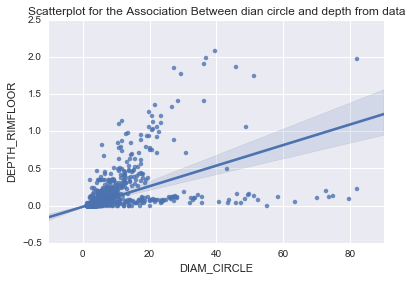

In [63]:
scat1 = seaborn.regplot(x="DIAM_CIRCLE_IMAGE", y="DEPTH_RIMFLOOR_TOPOG", data=data_clean)

plt.xlabel('DIAM_CIRCLE')
plt.ylabel('DEPTH_RIMFLOOR')
plt.title('Scatterplot for the Association Between diam circle and depth from data')
print (scat1)
plt.show()


Axes(0.125,0.125;0.775x0.775)


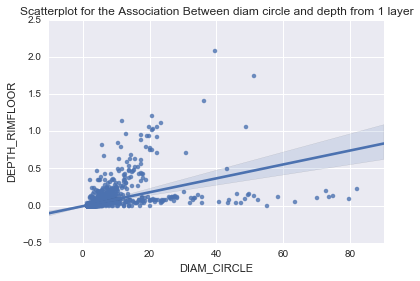

In [64]:
scat2 = seaborn.regplot(x="DIAM_CIRCLE_IMAGE", y="DEPTH_RIMFLOOR_TOPOG", data=sub1)
plt.xlabel('DIAM_CIRCLE')
plt.ylabel('DEPTH_RIMFLOOR')
plt.title('Scatterplot for the Association Between diam circle and depth from 1 layer')
print (scat2)
plt.show()

Axes(0.125,0.125;0.775x0.775)


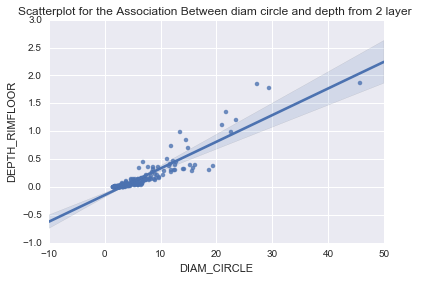

In [65]:
scat3 = seaborn.regplot(x="DIAM_CIRCLE_IMAGE", y="DEPTH_RIMFLOOR_TOPOG", data=sub2)
plt.xlabel('DIAM_CIRCLE')
plt.ylabel('DEPTH_RIMFLOOR')
plt.title('Scatterplot for the Association Between diam circle and depth from 2 layer ')
print (scat3)
plt.show()

Axes(0.125,0.125;0.775x0.775)


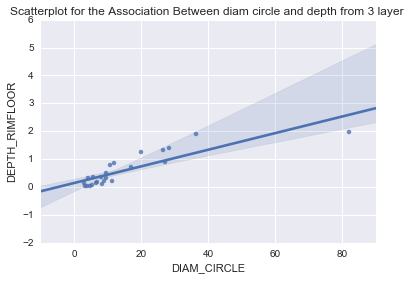

In [66]:
scat4 = seaborn.regplot(x="DIAM_CIRCLE_IMAGE", y="DEPTH_RIMFLOOR_TOPOG", data=sub3)
plt.xlabel('DIAM_CIRCLE')
plt.ylabel('DEPTH_RIMFLOOR')
plt.title('Scatterplot for the Association Between diam circle and depth from 3 layer ')
print (scat4)
plt.show()      